# Module 02: A Box Model Carbon Assignment

### 1. Introduction

In the accompanying notebook [mod02-CarbonModel1.ipynb](./mod02-CarbonModel1.ipynb) and in class we developed a relatively simple model of global carbon balance that assumed that tracked carbon in the atmosphere and biosphere. The system of equations we developed to describe this system are shown below,

$$
\begin{align*}
\frac{dM_1}{dt} &= F_{21} - F_{12}\\
&= k_{21}M_2 - k_{12}M_1
\end{align*}
$$

and,

$$
\begin{align*}
\frac{dM_2}{dt} &= F_{12} - F_{21}\\
&= k_{12}M_1 - k_{21}M_2
\end{align*}
$$

where $M_1$ is the mass of carbon in the atmosphere (GtC), $M_2$ is the mass of carbon in the biosphere (GtC), $F_{12}$ is the flux of carbon from the atmosphere to the biosphere due to photosynthesis (GtC/yr), and $F_{21}$ is the flux of carbon from the biosphere to the atmosphere due to decay and respiration (GtC/yr).

In that notebook we develop a numerical model to describe that system, run it for given initial conditions and with no external inputs of carbon (we call this an "unforced" scenario) and compare it to the analytical solution. We observed that as the time step increased, we departed further from the analytical solution. 

In this assignment you will take your model one step more realistic by ensuring that the photosynthetic flux depends on both the amount of carbon in the atmosphere and in the biosphere. Then you will examine the impact of anthropogenic emissions from 1751-2008 on the biosphere and atmosphere, and how alternative future scenarios of emissions mitigation affect your system. 

The code cell below contains a couple of new commands and some file names that you will need in this assignment. You will need all of these commands, _but not necessarily

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

historical_emissions_file = 'AnthropogenicEmissions.1751_2008.csv'
data = np.loadtxt(historical_emissions_file, delimiter=',', skiprows=1)
# Read this documentation to understand what this command does: 
#    https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html
year = data[:,0]
cflux = data[:,1]

#print(year)
t = np.arange(1751,2008,0.01)
cflux_t = np.interp(t, year, cflux)
# Read this documentation to understand what this command does: 
#    https://numpy.org/doc/stable/reference/generated/numpy.interp.html

np.diff(M1)
# Read this documentation to understand what this command does: 
#    https://numpy.org/doc/stable/reference/generated/numpy.diff.html

## 2. Assignment Tasks

For all plots, label all axes and provide units.

__Problem A: Modify and rerun the model__

1. Modify the model so that the photosynthesis flux includes the mass of carbon in the land (i.e., $M_2$). Use the following parameters:

  * $M_1^0$ = 1100.0 
  * $M_2^0$ = 300.0 
  * $k_{12}$ = 0.0003 
  * $k_{21}$ = 0.1  

2. Repeat the "unforced" (i.e., no anthropogenic emissions) simulation above, but run the model for `t = 100` years with a daily time step (i.e., `dt = 1/365`)
3. Use the `print()` command to print out the value of $M_1$ and $M_2$ at the end of the simulation

__Problem B: Examine impacts of human emissions__

1. Load the anthropogenic emissions data for 1751-2008 (see numpy `np.loadtxt()` command usage [here](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)). Note that the data is in a comma separated variable file (named `AnthropogenicEmissions.1751_2008.csv`) with one header row.
2. Plot the anthropogenic emissions data  
3. Starting from the initial conditions ($M_1^0$ and $M_2^0$) corresponding to the final conditions noted in part __A(3)__ above, simulate the response of the carbon system to the anthropogenic emissions from 1751 to 2008 by adding an appropriate source term in the system of equations. Create the following plots:

  * Mass of C in the atmosphere versus time 
  * Mass of C in the land versus time 
  * The change in mass of C in the atmosphere vs time 
  * The change in mass of C in the biosphere vs time 
    
4. Use the `print()` command to print out the value of $M_1$ and $M_2$ at the end of the simulation in 2008.

__Problem C: Examine the effects of mitigation__

1. Load the alternative emission scenarios contained in the file `.csv`, which represent three pathways to net zero emissions: (a) net zero emissions by the year 2030 (column 2), (c) net zero emissions by 2050 (column 3), and zero emissions growth (i.e., constant emissions) starting in 2008 (column 4).
2. Starting from the initial conditions ($M_1^0$ and $M_2^0$) corresponding to the final conditions noted in part __B(4)__ above, run the model three times, one for each scenario. Create the following plots: 

  * Mass of C in the atmosphere versus time (all three scenarios on one plot)
  * Mass of C in the land versus time (all three scenarios on one plot)
  * The change in mass of C in the atmosphere vs time 
  * The change in mass of C in the biosphere vs time 


### Problem A: Modify and rerun the model

If the photosynthetic rate depends not only on the atmospheric carbon content but also on the amout of biomass. In this case, according to book (Slingerland and Kump, 2011 page 50), The $F_{12}$ will be $$F_{12} = k_{12}M_1M_2$$.

Therefore, the equation will be 
$$
\frac{d M_{1}}{d t}=k_{21} M_{2}-k_{12} M_{1} M_{2}
$$
and
$$
\frac{d M_{2}}{d t}=k_{12} M_{1} M_{2}-k_{21} M_{2}
$$

Combined with the value,
  * $M_1^0$ = 1100.0 
  * $M_2^0$ = 300.0 
  * $k_{12}$ = 0.0003 
  * $k_{21}$ = 0.1  
 we can use finite difference method to calculate the results.

M1: 333.3333333333658
M2: 1066.6666666665792


Text(0, 0.5, 'M2 (GtC)')

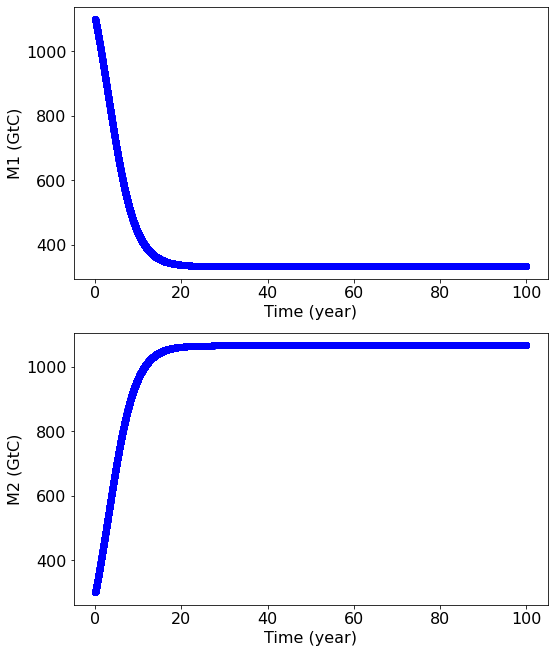

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# set up initial conditions
M1i = 1100.0
M2i = 300.0

k12 = 0.0003
k21 = 0.1

# set up the time range and step
ti = 0.0
tf = 100.0
dt = 1.0/365
t = np.arange(ti,tf+dt,dt)
Nt = t.size

# initial the M1 and M2
M1 = np.zeros((Nt,))
M2 = np.zeros((Nt,))

# Finte difference method
for i in np.arange(Nt):
    if (i==0):

        M1[i] = M1i
        M2[i] = M2i
        
    else:
        dM1dt = k21*M2[i-1] - k12*M1[i-1]*M2[i-1] # this part has been changed
        dM2dt = k12*M1[i-1]*M2[i-1] - k21*M2[i-1] # this part has been changed
        
        M1[i] = M1[i-1] + dM1dt*dt
        M2[i] = M2[i-1] + dM2dt*dt
        
# print the M1 and M2 at the end
print('M1:',M1[-1])
print('M2:',M2[-1])

# plot the M1 and M2 regarding the time

plt.figure(figsize=(8.5,11))
plt.rcParams.update({'font.size': 16})
plt.subplot(2,1,1)

plt.plot(t,M1,'bo')
plt.xlabel('Time (year)')
plt.ylabel('M1 (GtC)')

plt.subplot(2,1,2)
plt.plot(t,M2,'bo')
plt.xlabel('Time (year)')
plt.ylabel('M2 (GtC)')


### Problem B: Examine impacts of human emissions

If we consider the impact of anthropogenic emissions, the equation will be
$$
\frac{d M_{1}}{d t}=k_{21} M_{2}-k_{12} M_{1} M_{2} + F
$$
and
$$
\frac{d M_{2}}{d t}=k_{12} M_{1} M_{2}-k_{21} M_{2}
$$

$F$ is the anthropogenic emissions.

M1: 334.2556920914825
M2: 1066.6943216070927


Text(0, 0.5, 'The change in M2 (GtC)')

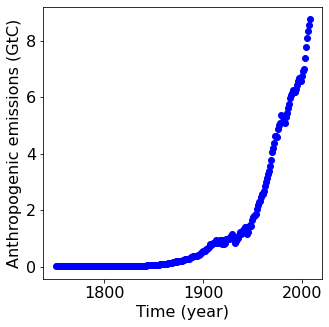

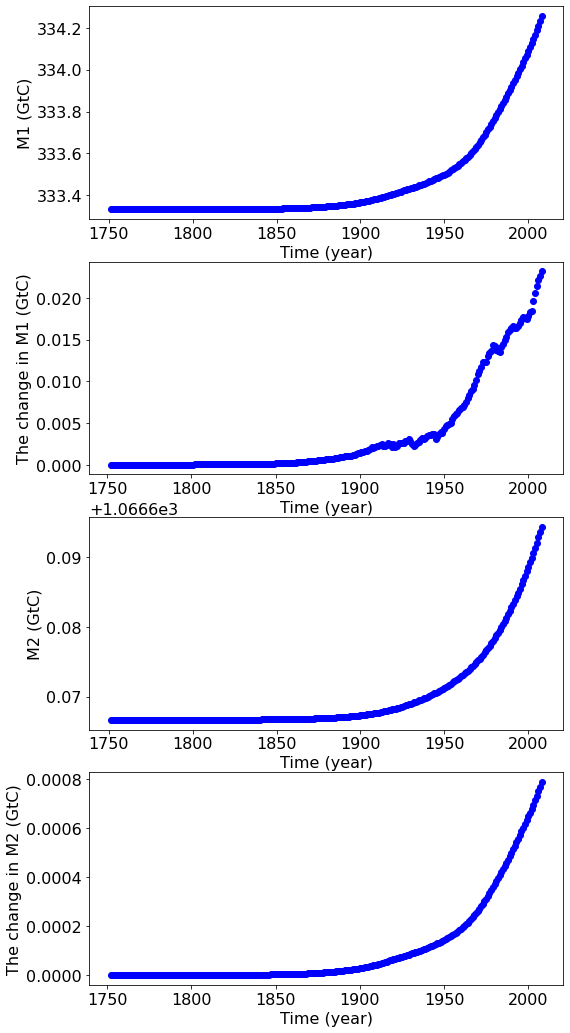

In [8]:
# laod the data
historical_emissions_file = 'AnthropogenicEmissions.1751_2008.csv'
data = np.loadtxt(historical_emissions_file, delimiter=',', skiprows=1)

year = data[:,0]
cflux = data[:,1]

## plot the anthropogenic emissions.
plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size': 16})
plt.plot(year,cflux,'bo')
plt.xlabel('Time (year)')
plt.ylabel('Anthropogenic emissions (GtC)')

## Set up the time
t = year
Nt = t.size

# set up initial conditions
M1i = 333.3333333333658
M2i = 1066.6666666665792

# initial the M1 and M2
M1 = np.zeros((Nt,))
M2 = np.zeros((Nt,))

# Finte difference method
for i in np.arange(Nt):
    if (i==0):

        M1[i] = M1i
        M2[i] = M2i
        
    else:
        dM1dt = k21*M2[i-1] - k12*M1[i-1]*M2[i-1] + cflux[i] # this part has been changed
        dM2dt = k12*M1[i-1]*M2[i-1] - k21*M2[i-1] 
        
        M1[i] = M1[i-1] + dM1dt*dt
        M2[i] = M2[i-1] + dM2dt*dt
        
# print the M1 and M2 at the end
print('M1:',M1[-1])
print('M2:',M2[-1])

# plot the M1 and M2 regarding the time

plt.figure(figsize=(8.5,18))
plt.rcParams.update({'font.size': 16})
plt.subplot(4,1,1)
plt.plot(t,M1,'bo')
plt.xlabel('Time (year)')
plt.ylabel('M1 (GtC)')
plt.subplot(4,1,2)
plt.plot(t[1:],np.diff(M1),'bo')
plt.xlabel('Time (year)')
plt.ylabel('The change in M1 (GtC)')
plt.subplot(4,1,3)
plt.plot(t,M2,'bo')
plt.xlabel('Time (year)')
plt.ylabel('M2 (GtC)')
plt.subplot(4,1,4)
plt.plot(t[1:],np.diff(M2),'bo')
plt.xlabel('Time (year)')
plt.ylabel('The change in M2 (GtC)')

### Problem C: Examine the effects of mitigation

If we consider the effects of mitigation, the equation will be
$$
\frac{d M_{1}}{d t}=k_{21} M_{2}-k_{12} M_{1} M_{2} - N
$$
and
$$
\frac{d M_{2}}{d t}=k_{12} M_{1} M_{2}-k_{21} M_{2}
$$

$N$ is the mitigation.


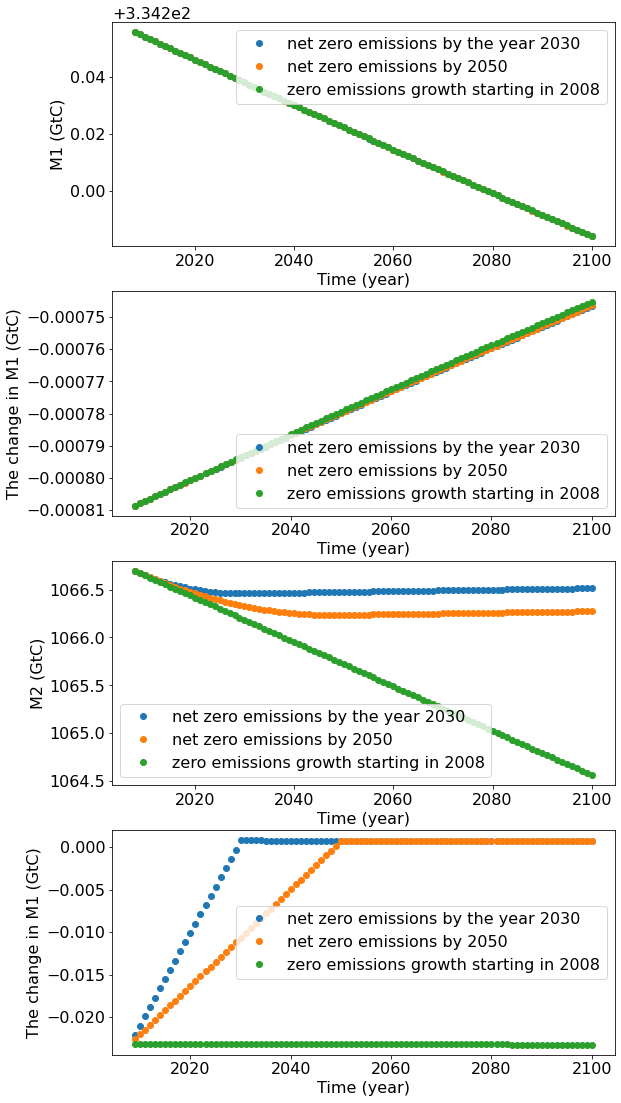

In [9]:

# load the data
future_emissions_file = 'EmissionsMitigationScenarios.2008_2100.csv'

data = np.loadtxt(future_emissions_file, delimiter=',', skiprows=1)
year = data[:,0]
cflux_nz2030 = data[:,1]
cflux_nz2050 = data[:,2]
cflux_zeg = data[:,3]

## Set up the time
t = year
Nt = t.size


M1_combo = np.zeros((Nt,3))
M2_combo = np.zeros((Nt,3))
    
for nn in range(3):
    
    ## change the flux source
    if nn==0:
        flux=cflux_nz2030
    elif nn==1:
        flux=cflux_nz2050
    else:
        flux=cflux_zeg
    
    # set up initial conditions
    M1i = 334.2556920914825
    M2i = 1066.6943216070927

    # initial the M1 and M2
    M1 = np.zeros((Nt,))
    M2 = np.zeros((Nt,))

    # Finte difference method
    for i in np.arange(Nt):
        if (i==0):

            M1[i] = M1i
            M2[i] = M2i

        else:
            dM1dt = k21*M2[i-1] - k12*M1[i-1]*M2[i-1] 
            dM2dt = k12*M1[i-1]*M2[i-1] - k21*M2[i-1] - flux[i] # this part has been changed

            M1[i] = M1[i-1] + dM1dt*dt
            M2[i] = M2[i-1] + dM2dt*dt
        
    M1_combo[:,nn]=M1
    M2_combo[:,nn]=M2

# plot the M1 and M2 regarding the time

plt.figure(figsize=(9,19))
plt.rcParams.update({'font.size': 16})
plt.subplot(4,1,1)
plt.plot(t,M1_combo,'o')
plt.xlabel('Time (year)')
plt.ylabel('M1 (GtC)')
plt.legend({'net zero emissions by the year 2030','net zero emissions by 2050','zero emissions growth starting in 2008'})
plt.subplot(4,1,2)
plt.plot(t[1:],np.diff(M1_combo, axis=0),'o')
plt.xlabel('Time (year)')
plt.ylabel('The change in M1 (GtC)')
plt.legend({'net zero emissions by the year 2030','net zero emissions by 2050','zero emissions growth starting in 2008'})
plt.subplot(4,1,3)
plt.plot(t,M2_combo,'o')
plt.xlabel('Time (year)')
plt.ylabel('M2 (GtC)')
plt.legend({'net zero emissions by the year 2030','net zero emissions by 2050','zero emissions growth starting in 2008'})
plt.subplot(4,1,4)
plt.plot(t[1:],np.diff(M2_combo, axis=0),'o')
plt.xlabel('Time (year)')
plt.ylabel('The change in M1 (GtC)')
plt.legend({'net zero emissions by the year 2030','net zero emissions by 2050','zero emissions growth starting in 2008'})